In [1]:
import pandas as pd
import random

# Number of data points
num_samples = 1000

# Define temperature ranges for both sensors
mlx90614_ranges = {
    'normal': (36.0, 37.5),
    'fever': (37.6, 40.0),  # Arbitrary upper limit for fever
    'hypothermia': (32.0, 35.9)  # Arbitrary lower limit for hypothermia
}

tmp007_ranges = {
    'normal': (36.0, 37.5),
    'fever': (37.6, 40.0),
    'hypothermia': (32.0, 35.9)
}

# Data generation
data = []

for i in range(num_samples):
    # Randomly select sensor type
    sensor_type = random.choice(['MLX90614', 'TMP007'])
    
    # Determine temperature status and generate corresponding temperature
    if sensor_type == 'MLX90614':
        status = random.choice(['normal', 'fever', 'hypothermia'])
        obj_temp = round(random.uniform(*mlx90614_ranges[status]), 1)
        ambient_temp = round(random.uniform(-40, 125), 1)  # Ambient temperature range for MLX90614
    else:
        status = random.choice(['normal', 'fever', 'hypothermia'])
        obj_temp = round(random.uniform(*tmp007_ranges[status]), 1)
        ambient_temp = round(random.uniform(-40, 125), 1)  # Ambient temperature range for TMP007
    
    # Append the generated data
    data.append({
        'sensor_type': sensor_type,
        'object_temperature': obj_temp,
        'ambient_temperature': ambient_temp,
        'measurement_status': status
    })

# Convert to DataFrame
df = pd.DataFrame(data)

# Display the first few rows of the dataset
print(df.head())

# Save to CSV
df.to_csv('baby_temperature_measurement_data.csv', index=False)

print("Artificial baby temperature measurement dataset generated.")

  sensor_type  object_temperature  ambient_temperature measurement_status
0      TMP007                33.9                107.6        hypothermia
1    MLX90614                36.6                122.3             normal
2      TMP007                33.5                112.7        hypothermia
3      TMP007                35.0                 50.0        hypothermia
4    MLX90614                34.1                -36.7        hypothermia
Artificial baby temperature measurement dataset generated.


NameError: name 'np' is not defined

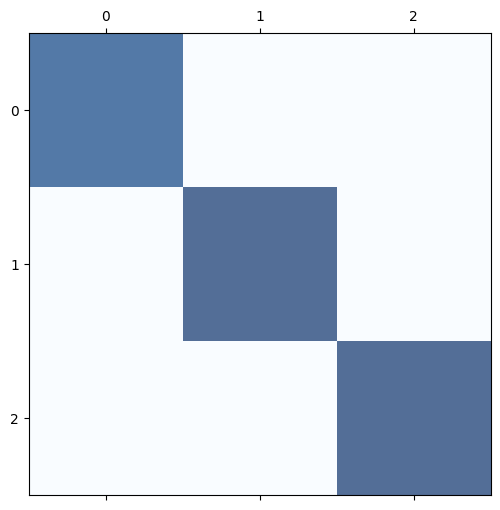

In [2]:
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc, precision_recall_curve

# Number of data points
num_samples = 1000

# Define temperature ranges for both sensors
mlx90614_ranges = {
    'normal': (36.0, 37.5),
    'fever': (37.6, 40.0),  # Arbitrary upper limit for fever
    'hypothermia': (32.0, 35.9)  # Arbitrary lower limit for hypothermia
}

tmp007_ranges = {
    'normal': (36.0, 37.5),
    'fever': (37.6, 40.0),
    'hypothermia': (32.0, 35.9)
}

# Data generation
data = []
for i in range(num_samples):
    # Randomly select sensor type
    sensor_type = random.choice(['MLX90614', 'TMP007'])

    # Determine temperature status and generate corresponding temperature
    if sensor_type == 'MLX90614':
        status = random.choice(['normal', 'fever', 'hypothermia'])
        obj_temp = round(random.uniform(*mlx90614_ranges[status]), 1)
        ambient_temp = round(random.uniform(-40, 125), 1)  # Ambient temperature range for MLX90614
    else:
        status = random.choice(['normal', 'fever', 'hypothermia'])
        obj_temp = round(random.uniform(*tmp007_ranges[status]), 1)
        ambient_temp = round(random.uniform(-40, 125), 1)  # Ambient temperature range for TMP007

    # Append the generated data
    data.append({
        'sensor_type': sensor_type,
        'object_temperature': obj_temp,
        'ambient_temperature': ambient_temp,
        'measurement_status': status
    })

# Convert to DataFrame
df = pd.DataFrame(data)

# Encode the categorical variables for modeling
df['measurement_status'] = df['measurement_status'].map({'normal': 0, 'fever': 1, 'hypothermia': 2})
df['sensor_type'] = df['sensor_type'].map({'MLX90614': 0, 'TMP007': 1})

# Features and target
X = df[['object_temperature', 'ambient_temperature', 'sensor_type']]
y = df['measurement_status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Calculate the confusion matrix and classification report
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(6, 6))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.7)
for (i, j), val in np.ndenumerate(cm):
    ax.text(j, i, f'{val}', ha='center', va='center', color='black')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Plot ROC Curve (only for binary classification)
fpr, tpr, _ = roc_curve(y_test, clf.predict_proba(X_test)[:, 1], pos_label=1)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Precision-Recall Curve (for multi-class classification)
y_scores = clf.predict_proba(X_test)
precision, recall, _ = precision_recall_curve(y_test, y_scores[:, 1])
plt.plot(recall, precision, color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

# Print classification report
print("Classification Report:\n", cr)

# Calculate accuracy and other metrics
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# You can also print the four parameters as follows:
# TP, TN, FP, FN for each class
for i in range(3):  # Assuming 3 classes (normal, fever, hypothermia)
    TP = cm[i, i]
    FN = cm[i].sum() - TP
    FP = cm[:, i].sum() - TP
    TN = cm.sum() - TP - FN - FP
    print(f"\nClass {i} (normal: 0, fever: 1, hypothermia: 2):")
    print(f"True Positives: {TP}, False Negatives: {FN}, False Positives: {FP}, True Negatives: {TN}")

# Save to CSV
df.to_csv('baby_temperature_measurement_data.csv', index=False)

print("Artificial baby temperature measurement dataset generated.")


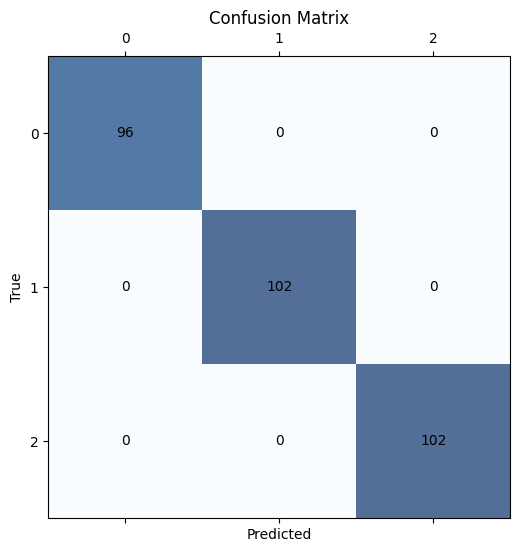

In [3]:
import numpy as np  # Add this import statement
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc, precision_recall_curve

# Rest of the code remains the same

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(6, 6))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.7)
for (i, j), val in np.ndenumerate(cm):
    ax.text(j, i, f'{val}', ha='center', va='center', color='black')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


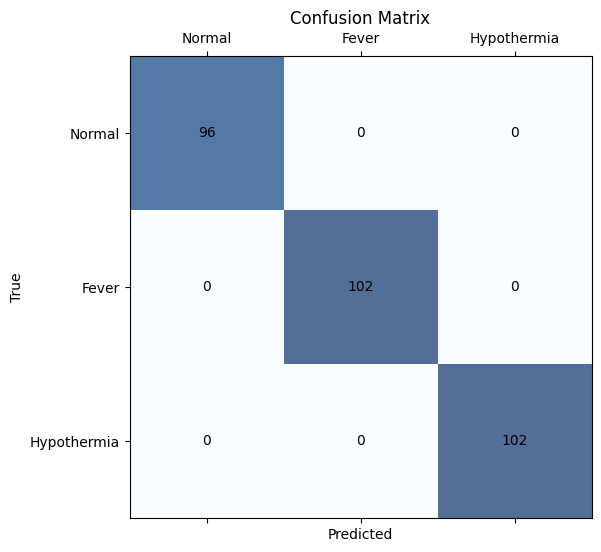

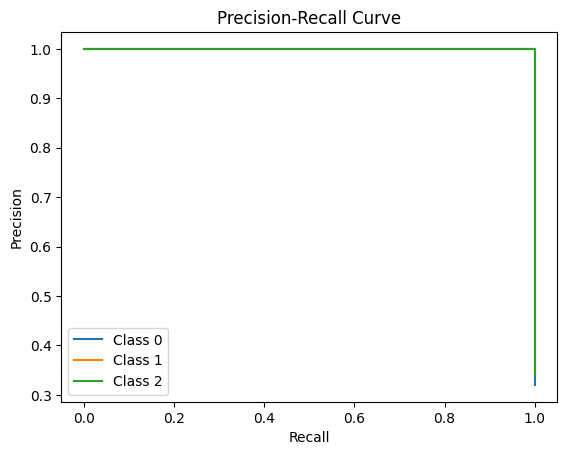

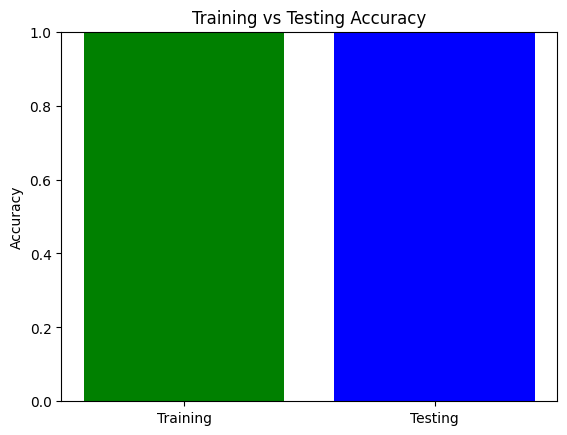

In [4]:
# Plot Confusion Matrix
def plot_confusion_matrix(cm, classes):
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.7)
    for (i, j), val in np.ndenumerate(cm):
        ax.text(j, i, f'{val}', ha='center', va='center', color='black')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.xticks(ticks=np.arange(len(classes)), labels=classes)
    plt.yticks(ticks=np.arange(len(classes)), labels=classes)
    plt.show()

# Confusion Matrix Plot
plot_confusion_matrix(cm, classes=['Normal', 'Fever', 'Hypothermia'])

# Precision-Recall Curve (for Testing Data)
y_scores = clf.predict_proba(X_test)
for i in range(y_scores.shape[1]):  # Plot for each class
    precision, recall, _ = precision_recall_curve(y_test == i, y_scores[:, i])
    plt.plot(recall, precision, label=f'Class {i}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()

# ROC Curve and AUC (Binary Classes)
if len(np.unique(y)) == 2:  # ROC only for binary classification
    fpr, tpr, _ = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

# Bar Plot: Training vs. Testing Accuracy
train_accuracy = accuracy_score(y_train, clf.predict(X_train))
test_accuracy = accuracy_score(y_test, y_pred)

plt.bar(['Training', 'Testing'], [train_accuracy, test_accuracy], color=['green', 'blue'])
plt.ylabel('Accuracy')
plt.title('Training vs Testing Accuracy')
plt.ylim(0, 1)
plt.show()


In [1]:
import torch
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms

# Assuming df contains your data
class TemperatureDataset(Dataset):
    def __init__(self, df, transform=None):
        self.data = df
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        # Replace with appropriate logic if using images
        features = self.data.iloc[idx][['object_temperature', 'ambient_temperature']].values.astype('float32')
        label = self.data.iloc[idx]['measurement_status']
        if self.transform:
            features = self.transform(features)
        return torch.tensor(features), torch.tensor(label)

# Define transformations (if needed)
transform = transforms.Compose([
    transforms.Normalize((36.5,), (5.0,))  # Normalize temperatures (adjust as needed)
])

# Split data and create DataLoaders
train_dataset = TemperatureDataset(df[df['split'] == 'train'], transform=transform)
test_dataset = TemperatureDataset(df[df['split'] == 'test'], transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


ModuleNotFoundError: No module named 'torch'